In [96]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [105]:
ds = fetch_openml('lungcancer_shedden',as_frame = False)
pandas =  fetch_openml('lungcancer_shedden',as_frame = True)
X = ds.data
y = ds.target
print(X,len(X),y)
print(ds)





[[ 1.          1.         64.         ...  6.33113352 13.63162192
  14.01098043]
 [ 0.          1.         62.         ...  6.13495028 11.76931629
  12.63990289]
 [ 0.          1.         70.         ...  6.14965358 12.0754535
  12.43182403]
 ...
 [ 0.          1.         81.         ...  6.54524206 13.20931909
  13.6113841 ]
 [ 0.          1.         65.         ...  6.52406617 12.22967678
  12.54320672]
 [ 1.          1.         61.         ...  6.45653144 12.87422563
  13.30104085]] 442 [1.33333333e+00 6.00000000e+00 3.91666667e+00 4.33333333e+00
 3.25000000e+00 5.50000000e+00 3.66666667e+00 5.83333333e+00
 6.25000000e+00 7.66666667e+00 5.41666667e+00 3.58333333e+00
 5.75000000e+00 3.33333333e+00 1.75000000e+00 2.41666667e+00
 2.16666667e+00 6.41666667e+00 1.66666667e-01 5.50000000e+00
 1.16666667e+00 2.75000000e+00 7.08333333e+00 5.50000000e+00
 1.25000000e+00 7.58333333e+00 5.66666667e+00 2.75000000e+00
 2.00000000e+00 5.16666667e+00 9.50000000e+00 3.33333333e-01
 1.66666667e+00 4

In [106]:
import math
from sklearn.linear_model import  LinearRegression
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

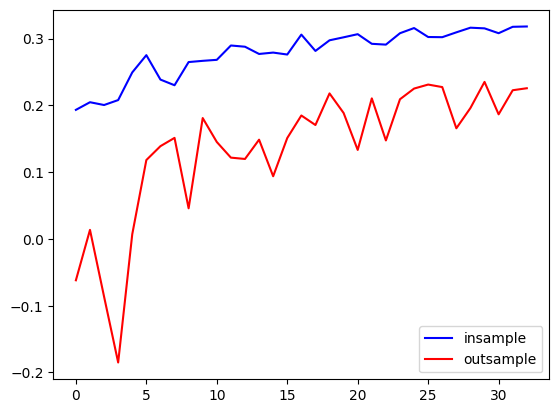

In [107]:
##Q2

inScore = []
outScore = []
for n in range(len(X)//4, math.floor(len(X)/10)*10,10):
    shuffler = np.random.permutation(len(X))
    X = X[shuffler]
    y = y[shuffler]
    X_train = X[0:n]
    y_train = y[0:n]
    regr = LinearRegression()
    regr.fit(X_train,y_train)
    inScore.append(regr.score(X,y))
    outScore.append(cross_val_score(regr,X_train,y_train).mean())
    
    # print(regr.score(X,y))
plt.plot(range(len(inScore)),inScore, "-b", label = 'insample')
plt.plot(range(len(outScore)),outScore,"-r", label = 'outsample')
plt.legend();
# plt.scatter([X[0]],pred[0],color = 'blue')

    

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [109]:
ds = fetch_openml('banknote-authentication',as_frame = False)
X = ds.data
y = ds.target
ds.feature_names


['V1', 'V2', 'V3', 'V4']

In [110]:
##q3

cointoss = np.random.randint(1,3,len(X));
acc = 0
for i in range(0, len(y)):
    if int(ds.target[i]) != cointoss[i]:
        acc+=1

print(acc/len(y))

lr = LogisticRegression()
generalizationError = 1 - cross_val_score(lr,X,y,cv = 4).mean()
print(generalizationError)
lr.fit(X,y)
print(lr.coef_)

0.5058309037900874
0.010204081632653073
[[-3.36496559 -1.88765064 -2.30699401 -0.08893876]]


In [111]:
##q3
preprocess = StandardScaler()
X = preprocess.fit_transform(X)
lr = LogisticRegression()
lr.fit(X,y)
print(lr.coef_)

[[-4.92846897 -5.0408545  -4.61464127  0.23687598]]


0.5532566979628872


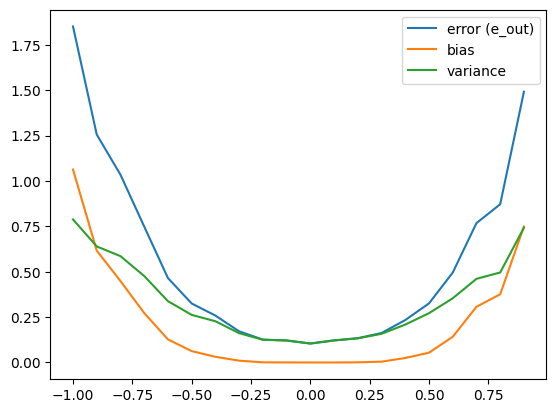

In [112]:
##q1

ans = []
bias = []
totalvar = []
for x in np.arange(-1,1,0.1):
    h = []
    var = []
    for i in range(0,1000):
        x_1 = np.random.uniform([-1,1])[0]
        x_2 = np.random.uniform([-1,1])[0]
        h.append(x * (x_1 + x_2) - x_1 * x_2)
        var.append((x * (x_1 + x_2) - x_1 * x_2 - np.array(h).mean())**2)
    bias.append((x ** 2 - np.array(h).mean()) ** 2)
    totalvar.append(np.array(var).mean())
    ans.append(bias[len(bias) - 1] + totalvar[len(totalvar)-1])
    var = []
    h = []
plt.plot(np.arange(-1,1,0.1),ans, label = 'error (e_out)')
plt.plot(np.arange(-1,1,0.1),bias, label = 'bias')
plt.plot(np.arange(-1,1,0.1),totalvar, label = 'variance')
plt.legend()
print(np.array(ans).mean())


